<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/filtering_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv("/content/wine_dataset.csv")

In [3]:
X =  df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]
y = LabelEncoder().fit_transform(df['style'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

CHI Square Method

In [5]:
test = SelectKBest(score_func=chi2, k=5).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_

In [6]:
Y = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar','chlorides', 
     'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density','pH', 'sulphates', 'alcohol', 'quality']

Text(0, 0.5, 'Features name')

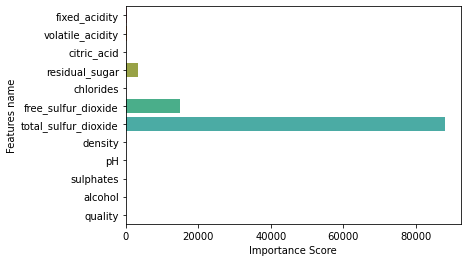

In [7]:
sns.barplot(x  = score,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

ANOVA using SVM

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

anova_filter = SelectKBest(f_classif, k=12)
clf = LinearSVC()
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('selectkbest', SelectKBest(k=12)), ('linearsvc', LinearSVC())])

In [30]:
from sklearn.metrics import classification_report

y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       311
           1       0.93      1.00      0.96       989

    accuracy                           0.94      1300
   macro avg       0.96      0.88      0.91      1300
weighted avg       0.95      0.94      0.94      1300



In [32]:
ranks = anova_svm[-1].coef_

In [36]:
ranks = ranks.reshape(-1)

Text(0, 0.5, 'Features name')

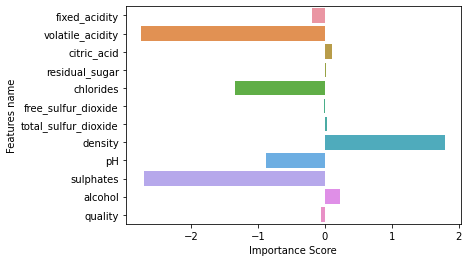

In [37]:
sns.barplot(x  = ranks,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

ANOVA using Logistic Regression

In [43]:
x = df.drop(['style'], axis =1)

In [48]:
anova_filter = SelectKBest(f_classif, k=len(x.columns))
linear_clasifier =  LogisticRegression()
anova_lr = make_pipeline(anova_filter, linear_clasifier)
anova_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('selectkbest', SelectKBest(k=12)),
                ('logisticregression', LogisticRegression())])

In [49]:
y_pred = anova_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       311
           1       0.99      0.99      0.99       989

    accuracy                           0.98      1300
   macro avg       0.97      0.98      0.97      1300
weighted avg       0.98      0.98      0.98      1300



In [50]:
ranks = anova_lr[-1].coef_
ranks = ranks.reshape(-1)

Text(0, 0.5, 'Features name')

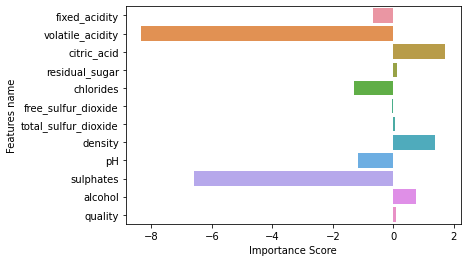

In [51]:
sns.barplot(x  = ranks,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')